In [1]:
import pandas as pd
import tweepy
import numpy as np
import cnfg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [22]:
# 2017 data
df_raw = pd.read_csv("march_madness_tweet_data_2017.csv")

In [23]:
exclude = ['privateers_mbb', 'usc_hoops', 'nccu_mbb', 'tiedyenation']

In [24]:
df = df_raw[~df_raw.twitter_handle.isin(exclude)]

In [25]:
tweet_features = ['num_favorites', 'num_followers', 'num_friends', 'num_statuses', 'retweet_avg', 'seed']
rank_features = [feature + "_rank" for feature in tweet_features]
all_features = tweet_features + rank_features
for feature in tweet_features:
    df[feature + "_rank"] = df[feature].rank(ascending = False)
df['average_rank'] = df[rank_features].mean(axis = 1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
model = pd.read_pickle("march_madness_2016_model.pickle")

In [27]:
x = df[all_features]

In [28]:
df['prediction'] = model.predict(x)
df['prediction_rank'] = df.prediction.rank()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
df.sort_values(['conference', 'seed']).to_csv("2017_predictions.csv", index = False)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


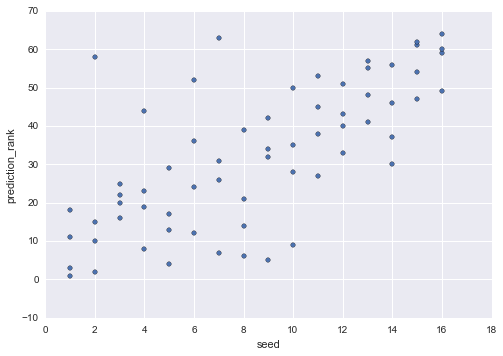

In [30]:
df.plot(kind = "scatter", x = "seed", y = "prediction_rank")